In [414]:
import subprocess

from IPython.display import display
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [415]:
path_to_mpi = "D:\\Projects\VisualSt_Projects\\HPC_computing\\Debug\\HPC_computing.exe"
path_to_mp = "D:\\Projects\VisualSt_Projects\\not_HPC_computing\\Debug\\not_HPC_computing.exe"
iterations_1 = 100000
iterations_2 = 100
_intervals_ = "0 1 0 2 0 3"
methods = ["Monte-Carlo", "Trapezoid", "Rectangle"]

# C++ functions

In [416]:
def start_open_mpi(n, full_path, iters, intervals, method):
    m = {"Monte-Carlo": 1, "Trapezoid": 2, "Rectangle": 3}
    command = f"mpiexec -n {n} {full_path} {m[method]} {iters} {intervals}"

    process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()
    if stdout:
        output = [float(x) for x in stdout.decode().split()]
        return output
    if stderr:
        print(f"Error: {stderr.decode()}")


def start_open_mp(n, full_path, iters, intervals, method):
    m = {"Monte-Carlo": 1, "Trapezoid": 2,  "Rectangle": 3}
    command = f"{full_path} {m[method]} {iters} {n} {intervals}"

    process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()
    if stdout:
        output = [float(x) for x in stdout.decode().split()]
        return output
    if stderr:
        print(f"Error: {stderr.decode()}")

# Computing with Open MP

,Threads,Value,Time,Speedup,Efficiency
0,1,27.9799,0.019019,1.000000,1.000000
1,2,27.9569,0.016403,1.159467,0.579733
2,3,27.9678,0.006635,2.866453,0.955484
3,4,27.9684,0.006800,2.796982,0.699246
4,5,27.9355,0.007019,2.709558,0.541912
5,6,27.9840,0.006026,3.156295,0.526049
6,7,27.9996,0.005453,3.487906,0.498272
7,8,27.9453,0.004771,3.986167,0.498271
8,9,27.9348,0.004470,4.254855,0.472762
9,10,27.9435,0.004155,4.577976,0.457798


,Threads,Value,Time,Speedup,Efficiency
0,1,28.0014,0.108066,1.000000,1.000000
1,2,28.0014,0.053324,2.026577,1.013288
2,3,28.0014,0.030816,3.506849,1.168950
3,4,28.0014,0.028207,3.831149,0.957787
4,5,28.0014,0.023971,4.508197,0.901639
5,6,28.0014,0.018550,5.825692,0.970949
6,7,28.0014,0.018324,5.897479,0.842497
7,8,28.0014,0.017345,6.230312,0.778789
8,9,28.0014,0.020448,5.284840,0.587204
9,10,28.0014,0.018805,5.746755,0.574675


,Threads,Value,Time,Speedup,Efficiency
0,1,27.9993,0.016417,1.000000,1.000000
1,2,27.9993,0.008385,1.957913,0.978956
2,3,27.9993,0.005791,2.835031,0.945010
3,4,27.9993,0.006074,2.702982,0.675745
4,5,27.9993,0.003715,4.419139,0.883828
5,6,27.9993,0.004196,3.912093,0.652016
6,7,27.9993,0.003819,4.298908,0.614130
7,8,27.9993,0.003390,4.843517,0.605440
8,9,27.9993,0.003131,5.243907,0.582656
9,10,27.9993,0.002885,5.691292,0.569129


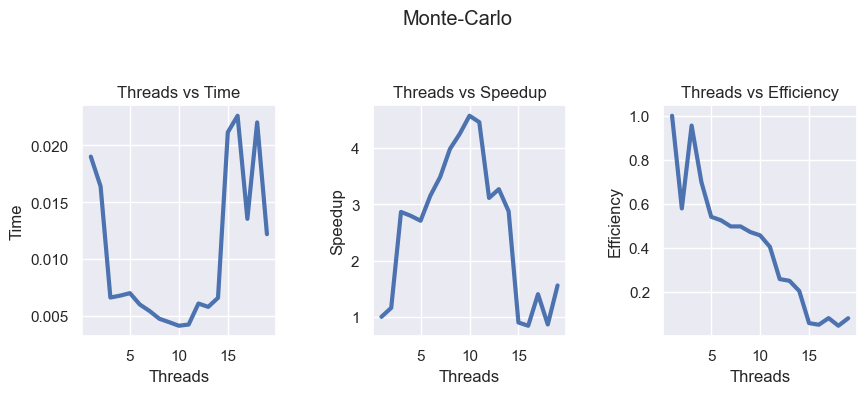

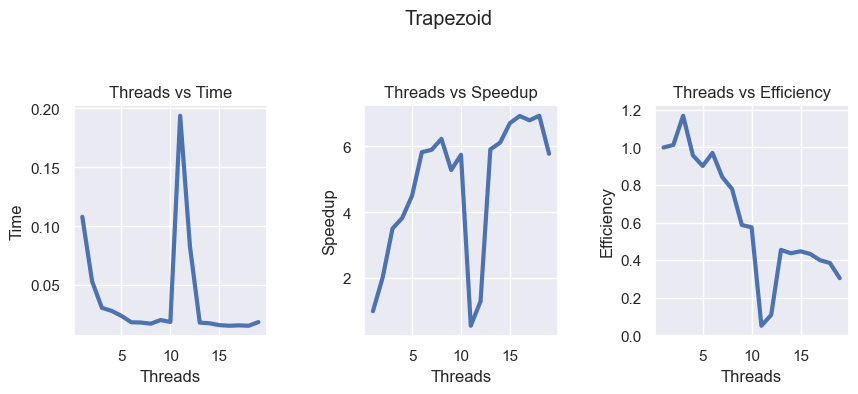

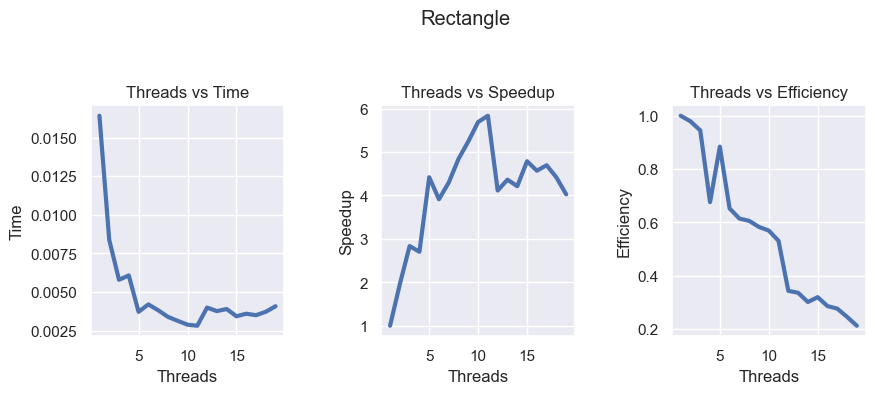

In [417]:
for k in methods:
    list_ = []
    T_sequential = 0
    iterations = iterations_1 if k == "Monte-Carlo" else iterations_2

    for i in range(1, 20):
        value, time = start_open_mp(n=i, full_path=path_to_mp, method=k, iters=iterations, intervals=_intervals_)
        
        if i == 1:
            T_sequential = time
            
        Speedup= T_sequential / time
        Efficiency = Speedup / i
        
        list_.append([i, value, time, Speedup, Efficiency])
        
    df = pd.DataFrame(list_, columns=['Threads','Value', 'Time',  'Speedup', 'Efficiency'])
    display(df)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))
    fig.suptitle(k, y=1.2)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    
    ax1.plot(df['Threads'], df['Time'], linewidth=3)
    ax1.set_title('Threads vs Time')
    ax1.set_xlabel('Threads')
    ax1.set_ylabel('Time')
    
    ax2.plot(df['Threads'], df['Speedup'], linewidth=3)
    ax2.set_title('Threads vs Speedup')
    ax2.set_xlabel('Threads')
    ax2.set_ylabel('Speedup')
    
    ax3.plot(df['Threads'], df['Efficiency'], linewidth=3)
    ax3.set_title('Threads vs Efficiency')
    ax3.set_xlabel('Threads')
    ax3.set_ylabel('Efficiency')

# Computing with Open MPI

,Threads,Value,Time,Speedup,Efficiency
0,1,28.0018,0.019501,1.000000,1.000000
1,2,27.9679,0.011070,1.761660,0.880830
2,3,27.9851,0.013495,1.445073,0.481691
3,4,27.8897,0.019644,0.992756,0.248189
4,5,27.9274,0.005211,3.742137,0.748427
5,6,27.9913,0.006334,3.078699,0.513116
6,7,27.9761,0.005648,3.452981,0.493283
7,8,27.9900,0.005790,3.367885,0.420986
8,9,28.0149,0.005615,3.473090,0.385899
9,10,28.0272,0.004800,4.062792,0.406279


0     28.0018
1     27.9679
2     27.9851
3     27.8897
4     27.9274
5     27.9913
6     27.9761
7     27.9900
8     28.0149
9     28.0272
10    27.9992
11    27.9950
12    28.0306
13    28.0267
14    28.0466
15    28.0453
16    28.0409
17    28.0554
18    28.0434
Name: Value, dtype: float64


,Threads,Value,Time,Speedup,Efficiency
0,1,28.0014,0.088632,1.000000,1.000000
1,2,28.0014,0.047220,1.876995,0.938497
2,3,27.6820,0.030479,2.907979,0.969326
3,4,28.0014,0.027657,3.204664,0.801166
4,5,28.0014,0.029420,3.012593,0.602519
5,6,26.7308,0.021394,4.142791,0.690465
6,7,27.3638,0.018941,4.679382,0.668483
7,8,26.7308,0.015931,5.563439,0.695430
8,9,27.6820,0.014941,5.932272,0.659141
9,10,28.0014,0.023335,3.798181,0.379818


0     28.0014
1     28.0014
2     27.6820
3     28.0014
4     28.0014
5     26.7308
6     27.3638
7     26.7308
8     27.6820
9     28.0014
10    27.6820
11    26.7308
12    25.1684
13    27.3638
14    24.8593
15    26.7308
16    23.3294
17    24.8593
18    26.4161
Name: Value, dtype: float64


,Threads,Value,Time,Speedup,Efficiency
0,1,27.9993,0.015074,1.000000,1.000000
1,2,27.9993,0.008521,1.768976,0.884488
2,3,27.6799,0.005829,2.586090,0.862030
3,4,27.9993,0.005509,2.736462,0.684115
4,5,27.9993,0.004681,3.220003,0.644001
5,6,26.7288,0.003976,3.791293,0.631882
6,7,27.3617,0.004223,3.569284,0.509898
7,8,26.7288,0.004283,3.519038,0.439880
8,9,27.6799,0.003585,4.204921,0.467213
9,10,27.9993,0.003581,4.209618,0.420962


0     27.9993
1     27.9993
2     27.6799
3     27.9993
4     27.9993
5     26.7288
6     27.3617
7     26.7288
8     27.6799
9     27.9993
10    27.6799
11    26.7288
12    25.1665
13    27.3617
14    24.8574
15    26.7288
16    23.3277
17    24.8574
18    26.4141
Name: Value, dtype: float64


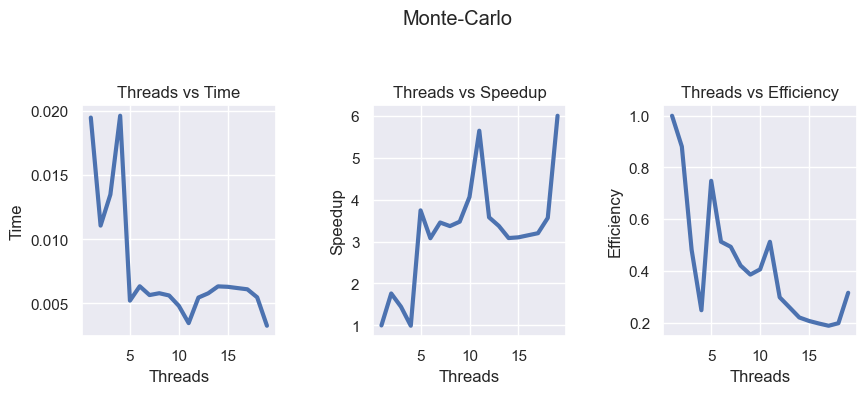

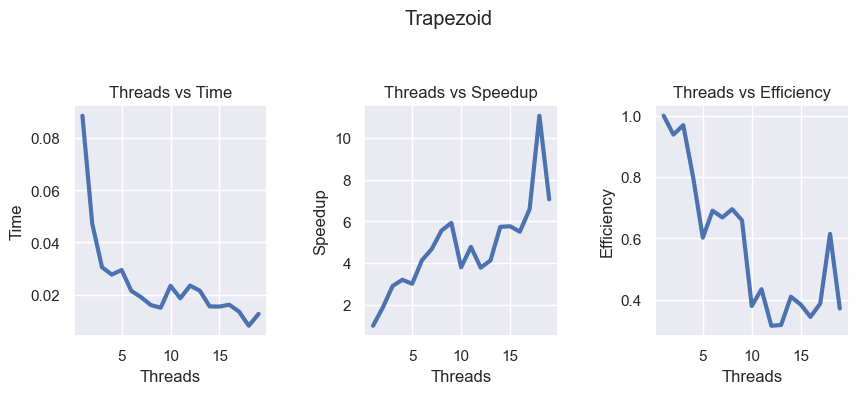

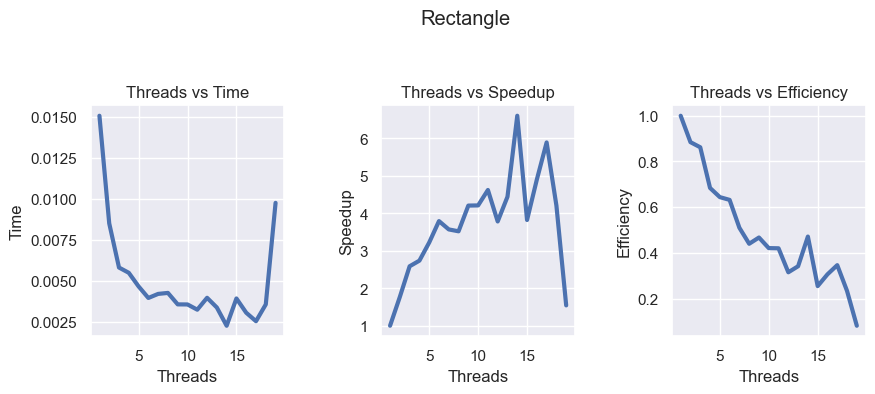

In [418]:
for k in methods:
    list_ = []
    T_sequential = 0
    iterations = iterations_1 if k == "Monte-Carlo" else iterations_2

    for i in range(1, 20):
        value, time = start_open_mpi(n=i, full_path=path_to_mpi, method=k, iters=iterations, intervals=_intervals_)
        
        if i == 1:
            T_sequential = time
            
        Speedup= T_sequential / time
        Efficiency = Speedup / i
        
        list_.append([i, value, time, Speedup, Efficiency])
        
    df = pd.DataFrame(list_, columns=['Threads','Value', 'Time',  'Speedup', 'Efficiency'])
    display(df)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))
    fig.suptitle(k, y=1.2)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    
    ax1.plot(df['Threads'], df['Time'], linewidth=3)
    ax1.set_title('Threads vs Time')
    ax1.set_xlabel('Threads')
    ax1.set_ylabel('Time')
    
    ax2.plot(df['Threads'], df['Speedup'], linewidth=3)
    ax2.set_title('Threads vs Speedup')
    ax2.set_xlabel('Threads')
    ax2.set_ylabel('Speedup')
    
    ax3.plot(df['Threads'], df['Efficiency'], linewidth=3)
    ax3.set_title('Threads vs Efficiency')
    ax3.set_xlabel('Threads')
    ax3.set_ylabel('Efficiency')
